## Imports

In [2]:
import inspect
import os  # paths para os scripts
import sys

sys.path.append(os.path.join(os.path.dirname(sys.path[0]), "src"))
sys.path.append(os.path.join(os.path.dirname(sys.path[0]), "src", "data"))
sys.path.append(os.path.join(os.path.dirname(sys.path[0]), "src", "features"))
sys.path.append(os.path.join(os.path.dirname(sys.path[0]), "src", "models"))
sys.path.append(os.path.join(os.path.dirname(sys.path[0]), "src", "visualization"))
import context as c  # shotscuts para os paths

In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [5]:
import seaborn as sns

In [6]:
df = pd.read_csv(c.DATA_PROCESSED_FLD/'datasetFinal.csv')

In [7]:
df

,ct_armor,ct_helmets,t_helmets,ct_defuse_kits,t_armor,ct_grenade_flashbang,ct_players_alive,ct_grenade_smokegrenade,ct_weapon_awp,t_weapon_ak47,...,ct_weapon_ak47,t_grenade_flashbang,ct_weapon_sg553,t_weapon_sg553,ct_weapon_usps,t_weapon_awp,t_players_alive,t_grenade_smokegrenade,t_weapon_usps,tr_win
0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0
1,400.0,0.0,0.0,1.0,300.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,5.0,2.0,0.0,0
2,294.0,0.0,0.0,1.0,200.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,2.0,0.0,0
3,294.0,0.0,0.0,1.0,200.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0
4,192.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,195.0,2.0,4.0,1.0,359.0,1.0,2.0,1.0,0.0,1.0,...,0.0,2.0,0.0,2.0,2.0,1.0,4.0,1.0,0.0,1
122406,95.0,1.0,2.0,1.0,175.0,1.0,5.0,1.0,0.0,0.0,...,0.0,2.0,0.0,1.0,5.0,1.0,5.0,0.0,0.0,1
122407,495.0,3.0,5.0,1.0,475.0,4.0,5.0,3.0,0.0,2.0,...,0.0,4.0,0.0,1.0,1.0,1.0,5.0,5.0,0.0,1
122408,495.0,3.0,5.0,1.0,475.0,1.0,5.0,0.0,0.0,2.0,...,0.0,5.0,0.0,2.0,1.0,1.0,5.0,3.0,0.0,1


## Separação Treino e Teste

In [8]:
X,y = df.drop('tr_win', axis=1),df['tr_win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (97928, 24)
X_test shape:  (24482, 24)


## Teste para n valores de K

In [ ]:
# Range de valores de k que iremos testar
kVals = range(1, 30, 2)

# Lista vazia para receber as acurácias
acuracias = []

# Loop em todos os valores de k para testar cada um deles
for k in kVals:
    
    # Treinando o modelo KNN com cada valor de k
    modeloKNN = KNeighborsClassifier(n_neighbors = k)
    modeloKNN.fit(X_train, y_train)
          
    # Avaliando o modelo e atualizando a lista de acurácias
    score = modeloKNN.score(X_test, y_test)
    print("Com valor de k = %d, a acurácia é = %.2f%%" % (k, score * 100))
    acuracias.append(score)

In [15]:
#i = np.argmax(acuracias)
i= 1
#print("O valor de k = %d alcançou a mais alta acurácia de %.2f%% nos dados de validação!" % (kVals[i], 
                                                                                             #acuracias[i] * 100))

## Modelo Final

In [16]:
# Criando a versão final do modelo com o maior valor de k
modeloFinal = KNeighborsClassifier(n_neighbors = kVals[i])

In [17]:
# Treinamento do modelo
modeloFinal.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Avaliação do Resultados

In [18]:
# Previsões com os dados de teste
predictions = modeloFinal.predict(X_test)

In [19]:
# Performande do modelo nos dados de teste
print("Avaliação do Modelo nos Dados de Teste")
print(classification_report(y_test, predictions))

Avaliação do Modelo nos Dados de Teste
              precision    recall  f1-score   support

           0       0.76      0.77      0.77     12004
           1       0.77      0.77      0.77     12478

    accuracy                           0.77     24482
   macro avg       0.77      0.77      0.77     24482
weighted avg       0.77      0.77      0.77     24482



In [20]:
def plot_matriz_confusao(y_true_teste, y_pred_teste, group_names=None,
                         categories='auto', count=True, cbar=True,
                         xyticks=True, sum_stats=True, figsize=None,
                         cmap='viridis', title=None):

    cf = confusion_matrix(y_true_teste, y_pred_teste)

    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    box_labels = [f"{v1}{v2}".strip()
                  for v1, v2 in zip(group_labels, group_counts)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    if sum_stats:

        accuracy = accuracy_score(y_true_teste, y_pred_teste)
        precision = precision_score(y_true_teste, y_pred_teste)
        recall = recall_score(y_true_teste, y_pred_teste)
        f1_score_metric = f1_score(y_true_teste, y_pred_teste)

        stats_text = "\n\nAcurácia={:0.3f}\nPrecisão={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
            accuracy, precision, recall, f1_score_metric)
    else:
        stats_text = ""

    if figsize == None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks == False:
        categories = False

    plt.figure(figsize=figsize)
    sns.set(font_scale=1.4)  # for label size
    sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap, cbar=cbar,
                xticklabels=categories, yticklabels=categories)
    plt.ylabel('Valores verdadeiros', fontsize=16)
    plt.xlabel('Valores preditos' + stats_text, fontsize=16)

    if title:
        plt.title(title, fontsize=20)

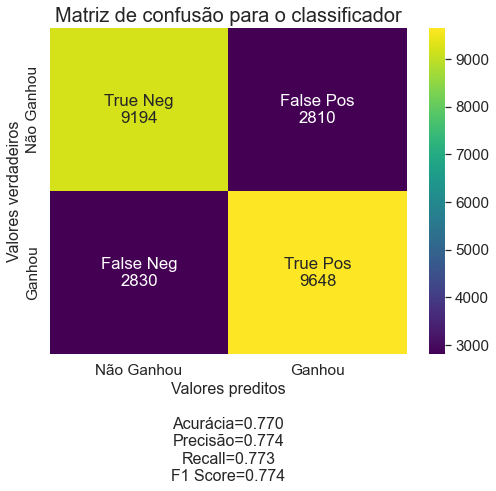

In [21]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Não Ganhou", "Ganhou"]
plot_matriz_confusao(y_test,
                      predictions,
                      group_names=labels,
                      categories=categories,
                      figsize=(8, 6), 
                      title="Matriz de confusão para o classificador")